# Lab One : Visualization and Data Pre-processing

### Group 3 - Members:

_Apurv Mittal_<br>
_Seemant Srivastava_<br>
_Ravi Sivaraman_<br>
_Tai Chowdhury_<br>


In [3]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from scipy import stats
import warnings
from shapely.geometry import Point
#import geopandas as gpd
#from geopandas import GeoDataFrame
import plotly.express as px


In [4]:
#Ignore Warnings on final

warnings.filterwarnings('ignore')

In [5]:
# Read the Australia weather data
df = pd.read_csv("weatherAUS.csv")

In [6]:
#  View the top rows of the data imported
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
#Drop Date and Location

df = df.drop(['Date', 'Location'], axis = 1)

In [8]:
# Removing records which are blank for Rain today and Rain tomorrow

df.dropna(subset = ["RainToday"], inplace=True)
df.dropna(subset = ["RainTomorrow"], inplace=True)


# Seperate the data into categorical and numeric

df_num = df.columns[df.dtypes == 'float64']
df_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)



# REFERENCE: https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

Numeric Variables: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical Variables: Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')


#### Data Imputation

In [9]:
# Impute data (numeric) based on the mean for RainToday and RainTomorrow

df_impute = df
mat_yesno = df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()
RAINTODAY=0
RAINTOMORROW=1
COUNTER = 0
for i in range(2):
    for j in range(2):
        for indexattr in mat_yesno.iloc[COUNTER].index:
            df_impute.loc[(df_impute["RainToday"] == mat_yesno.iloc[COUNTER].name[RAINTODAY] ) 
                          & (df_impute["RainTomorrow"] == mat_yesno.iloc[COUNTER].name[RAINTOMORROW]) 
                          & (df_impute[indexattr].isnull()), indexattr] = mat_yesno.iloc[COUNTER][indexattr]
        COUNTER = COUNTER + 1

        
        
# Impute data (categorical) with mode of each variable

df_impute['WindDir9am'] = df_impute['WindDir9am'].fillna(df_impute['WindDir9am'].mode()[0])
df_impute['WindGustDir'] = df_impute['WindGustDir'].fillna(df_impute['WindGustDir'].mode()[0])
df_impute['WindDir3pm'] = df_impute['WindDir3pm'].fillna(df_impute['WindDir3pm'].mode()[0])

As mentioned above, we imputed data for all numeric variables with the means for the combination of `RainToday` and `RainTomorrow`. We calcualted the value for `RainToday` and `RainTomorrow` both as "No" and imputed the data for the missing variables for such combination, similary calculated `RainToday` as "Yes" and `RainTomorrow` as "No" and imputed the mean value for the variable so and so forth.

For categorical variables `WindDir9am`, `WindDir3pm` are covering the direction of the wind at different 9 am and 3 pm respectively, while `WindGustDir`is the direction of the wind gust. All these variables are about the direction and and the largest missing variable is `6.8%` for Wind Direction at 9 am. We decided to impute this data with the Mode for each of the categorical variable.


## 8.New Features

   ### New Feature 1: Added State a new feature
   
   The original dataset we downloaded had just `Cities`, but we want to include `State`, as some analysis are done for the entire state. We found the dataset for Australian cities and state and then created a dataframe from Cities/State csv file and then joined with the original dataset to create a new feature called `State`.
   
 
 The code to add the cities state are done in `Simple Statistics` section, we are referencing here the code on how it is done.
 
#Add State
state_df = pd.read_csv("loc.csv")
df_impute = pd.merge(df_impute, state_df, on='Location', how='outer')
df_impute.isnull().sum()

`State` is an useful parameter for our EDA analysis.


In [10]:
df_impute["Rainfall"].describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

## 9. Exceptional Work

In [11]:
df_impute_num = df.columns[df.dtypes == 'float64']
df_impute_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)

Numeric Variables: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical Variables: Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')


Creating different dataframes for continous and categorical variables.

In [12]:
X=df_impute[df_num]
y = df.RainTomorrow

Assigning the `RainTomorrow` as our response variable (y) and all other continous variable as X

In [13]:
print('features shape:', X.shape) 
print('target shape:', y.shape )

features shape: (140787, 16)
target shape: (140787,)


   ### Principal Component Analysis

Cumulative Explained variance of components:  1.0000000000000002
PCA(n_components=16)
Variance explained by each component:             0
0   0.324262
1   0.211319
2   0.122472
3   0.068379
4   0.055946
5   0.046740
6   0.042430
7   0.032006
8   0.025687
9   0.021170
10  0.020327
11  0.017020
12  0.006674
13  0.002314
14  0.001786
15  0.001468

 Cumulative Variance explained by additional component:             0
0   0.324262
1   0.535582
2   0.658054
3   0.726434
4   0.782379
5   0.829120
6   0.871549
7   0.903555
8   0.929242
9   0.950412
10  0.970739
11  0.987759
12  0.994433
13  0.996747
14  0.998532
15  1.000000


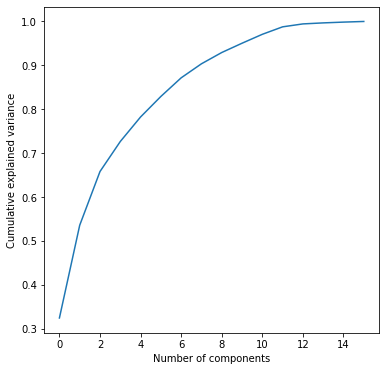

In [14]:
# PCA Code

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardizing the features
X = StandardScaler().fit_transform(X)

pca = PCA(n_components = 16)

principalComponents = pca.fit_transform(X)

principalDF = pd.DataFrame(data = principalComponents)

#finalDF = pd.concat([principalDF, df[['RainTomorrow']]], axis =1)

plt.subplots(figsize=(6, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
print('Cumulative Explained variance of components: ',sum(pca.explained_variance_ratio_[0:199]) )
print(pca)


variation = pd.DataFrame(pca.explained_variance_ratio_)
cumulative_variation = pd.DataFrame(pca.explained_variance_ratio_.cumsum())
print("Variance explained by each component: ",variation)
print ("\n Cumulative Variance explained by additional component: ", cumulative_variation)

# Reference : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

*Principal Component Analysis* is a method to reduce the number of features from a large features, while still maintaining the overall accuracy of the model. In a large dataset with hundreds of features, there are only a select few may have impact compared to the rest. The dimensions that influcence the models rise rapids and elbows at a point, then asymptotes. After that point, there is diminishing returns while adding more features. 

Having more features will ultimately help, but considering the amount of reduction in dimensions and the processing power to compute the models and complexities are drastically reduced. Improvement in accuracy of the model doesn't justify the extra processing power or the compleixities in the model.

In the above PCA analysis, there are 16 continuous features. However PCA indicates the graph flattens at 11 features, and adding five more dimensions doesnt improve the model as much.

At 8 components the model explains the variance is 92.9%, and at 12 components variance explained is 99.44%.

Anything more than 8 components isn't going to add much better accuracy.

### Handling Class Imbalance For Rainfall Prediction

In [15]:
df_impute['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df_impute['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

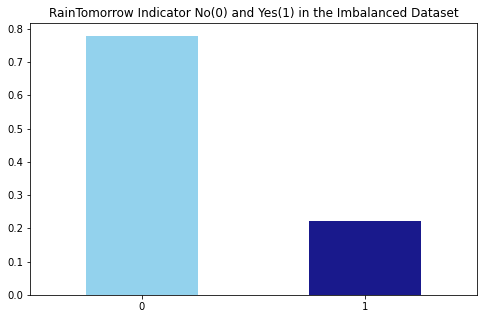

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df_impute['RainTomorrow'].value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe that the presence of “0” and “1” is almost in the 78:22 ratio. So there is a class imbalance and we have to deal with it. To fight against the class imbalance, we will use here the oversampling of the minority class. Since the size of the dataset is quite small, majority class subsampling wouldn’t make much sense here.

In [17]:
from sklearn.utils import resample

no = df_impute[df_impute.RainTomorrow == 0]
yes = df_impute[df_impute.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

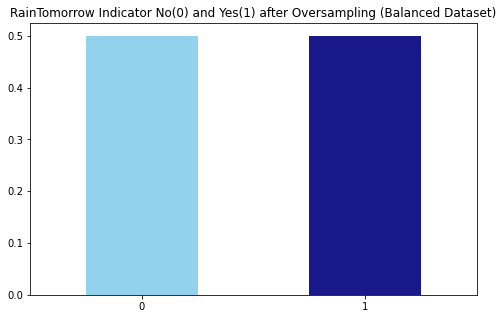

In [18]:
fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [19]:
len(oversampled)


219172

In [21]:

# perform one-hot encoding of the categorical data "embarked"
gust_df = pd.get_dummies(df_impute.WindGustDir,prefix='GustDir')
wind3pm_df = pd.get_dummies(df_impute.WindDir3pm,prefix='Wind3pm')
wind9am_df = pd.get_dummies(df_impute.WindDir9am,prefix='Wind9am')
df_impute = pd.concat((df_impute,gust_df, wind3pm_df, wind9am_df),axis=1) # add back into the dataframe

# replace the current Sex atribute with something slightly more intuitive and readable
df_impute['IsRainToday'] = df_impute.RainToday=='Yes' 
df_impute.IsRainToday = df_impute.IsRainToday.astype(np.int)

df_impute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 70 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        140787 non-null  float64
 1   MaxTemp        140787 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    140787 non-null  float64
 4   Sunshine       140787 non-null  float64
 5   WindGustDir    140787 non-null  object 
 6   WindGustSpeed  140787 non-null  float64
 7   WindDir9am     140787 non-null  object 
 8   WindDir3pm     140787 non-null  object 
 9   WindSpeed9am   140787 non-null  float64
 10  WindSpeed3pm   140787 non-null  float64
 11  Humidity9am    140787 non-null  float64
 12  Humidity3pm    140787 non-null  float64
 13  Pressure9am    140787 non-null  float64
 14  Pressure3pm    140787 non-null  float64
 15  Cloud9am       140787 non-null  float64
 16  Cloud3pm       140787 non-null  float64
 17  Temp9am        140787 non-nul

In [22]:
# Dropping categorical columns

df_impute = df_impute.drop(['WindDir3pm', 'WindDir9am', 'WindGustDir', 'RainToday'], axis = 1)

In [23]:
#get_dummies using oversampled dataframe

# perform one-hot encoding of the categorical data "embarked"
gust_df = pd.get_dummies(oversampled.WindGustDir,prefix='GustDir')
wind3pm_df = pd.get_dummies(oversampled.WindDir3pm,prefix='Wind3pm')
wind9am_df = pd.get_dummies(oversampled.WindDir9am,prefix='Wind9am')
oversampled = pd.concat((oversampled,gust_df, wind3pm_df, wind9am_df),axis=1) # add back into the dataframe

# replace the current Sex atribute with something slightly more intuitive and readable
oversampled['IsRainToday'] = oversampled.RainToday=='Yes' 
oversampled.IsRainToday = oversampled.IsRainToday.astype(np.int)

oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219172 entries, 0 to 23585
Data columns (total 70 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        219172 non-null  float64
 1   MaxTemp        219172 non-null  float64
 2   Rainfall       219172 non-null  float64
 3   Evaporation    219172 non-null  float64
 4   Sunshine       219172 non-null  float64
 5   WindGustDir    219172 non-null  object 
 6   WindGustSpeed  219172 non-null  float64
 7   WindDir9am     219172 non-null  object 
 8   WindDir3pm     219172 non-null  object 
 9   WindSpeed9am   219172 non-null  float64
 10  WindSpeed3pm   219172 non-null  float64
 11  Humidity9am    219172 non-null  float64
 12  Humidity3pm    219172 non-null  float64
 13  Pressure9am    219172 non-null  float64
 14  Pressure3pm    219172 non-null  float64
 15  Cloud9am       219172 non-null  float64
 16  Cloud3pm       219172 non-null  float64
 17  Temp9am        219172 non-null

In [24]:
# Dropping categorical columns

oversampled = oversampled.drop(['WindDir3pm', 'WindDir9am', 'WindGustDir', 'RainToday'], axis = 1)

In [25]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219172 entries, 0 to 23585
Data columns (total 66 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        219172 non-null  float64
 1   MaxTemp        219172 non-null  float64
 2   Rainfall       219172 non-null  float64
 3   Evaporation    219172 non-null  float64
 4   Sunshine       219172 non-null  float64
 5   WindGustSpeed  219172 non-null  float64
 6   WindSpeed9am   219172 non-null  float64
 7   WindSpeed3pm   219172 non-null  float64
 8   Humidity9am    219172 non-null  float64
 9   Humidity3pm    219172 non-null  float64
 10  Pressure9am    219172 non-null  float64
 11  Pressure3pm    219172 non-null  float64
 12  Cloud9am       219172 non-null  float64
 13  Cloud3pm       219172 non-null  float64
 14  Temp9am        219172 non-null  float64
 15  Temp3pm        219172 non-null  float64
 16  RainTomorrow   219172 non-null  int64  
 17  GustDir_E      219172 non-null

In [46]:
# cv object using df_impute

from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if "RainTomorrow" in df_impute:
    y = df_impute["RainTomorrow"].values # get the labels we want
    del df_impute["RainTomorrow"] # get rid of the class label
    X = df_impute.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 123)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=123, test_size=0.2, train_size=None)


In [45]:
#Shufflesplit using oversampled dataframe

from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if "RainTomorrow" in oversampled:
    y = oversampled["RainTomorrow"].values # get the labels we want
    del oversampled["RainTomorrow"] # get rid of the class label
    X_over = oversampled.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object_over = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 123)
                         
print(cv_object_over)

ShuffleSplit(n_splits=3, random_state=123, test_size=0.2, train_size=None)


### Logistic Regression 

In [47]:
#Logistic Regression Using df_impute

# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='elasticnet', C=1.0, class_weight='balanced', solver='saga', l1_ratio=1) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
lr_clf.fit(X_train,y_train)  # train object
y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print("====Iteration",iter_num," ====")
print("accuracy", acc )
print("confusion matrix\n",conf)
iter_num+=1    


====Iteration 0  ====
accuracy 0.8484316185696361
confusion matrix
 [[18469  3284]
 [ 3360 18722]]


In [31]:
#Logistic Regression Using oversampled dataframe

# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='elasticnet', C=1.0, class_weight=None, solver='saga', l1_ratio=1) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object_over.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train_over = X[train_indices]
    y_train_over = y[train_indices]
    
    X_test_over = X[test_indices]
    y_test_over = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
lr_clf.fit(X_train_over,y_train_over)  # train object
y_hat_over = lr_clf.predict(X_test_over) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test_over,y_hat_over)
conf = mt.confusion_matrix(y_test_over,y_hat_over)
print("====Iteration",iter_num," ====")
print("accuracy", acc )
print("confusion matrix\n",conf)
iter_num+=1 

====Iteration 0  ====
accuracy 0.8482491160031937
confusion matrix
 [[18477  3276]
 [ 3376 18706]]


## Alternative/Shorter version of logistic regression

In [35]:
# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num,(train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit([train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict([test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

ValueError: Found input variables with inconsistent numbers of samples: [1, 175337]

In [ ]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X_new, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

In [ ]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None,solver='liblinear') # get object
    accuracies = cross_val_score(lr_clf,X_new,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

### Interpreting the weights - Need to add explanations

In [ ]:

# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = oversampled.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct?

In [48]:
#StandardScaler for df_impute

from sklearn.preprocessing import StandardScaler


# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df_impute.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them outv

accuracy: 0.8517622904072089
[[18526  3227]
 [ 3271 18811]]
Pressure3pm has weight of -1.2893491392115064
Sunshine has weight of -1.2757407782382562
MinTemp has weight of -0.32202784113584393
MaxTemp has weight of -0.11797132554435799
Evaporation has weight of -0.10589350647005544
WindSpeed3pm has weight of -0.09311722301307992
WindSpeed9am has weight of -0.08563384308454434
Wind9am_SSE has weight of -0.05657467743047443
Wind9am_SE has weight of -0.05143238922710375
Wind9am_S has weight of -0.04967165158342632
Wind9am_ESE has weight of -0.04854793915458576
Wind3pm_SSE has weight of -0.04694103714140655
GustDir_N has weight of -0.04153617068834795
Wind3pm_S has weight of -0.034738666819195935
Wind3pm_SW has weight of -0.03220597469343543
GustDir_NNE has weight of -0.03183038211646515
Wind3pm_NE has weight of -0.029951901413006753
Wind3pm_ESE has weight of -0.028761164868655358
Wind3pm_E has weight of -0.027802563585749035
Wind9am_E has weight of -0.025506349214068767
Wind3pm_SSW has wei

In [ ]:
#StandardScaler for oversampled

from sklearn.preprocessing import StandardScaler


# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,oversampled.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them outv

### Needs attention

In [ ]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=oversampled.columns)
weights.plot(kind='bar')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') 

# create the pipline
piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

weights = []
# run the pipline cross validated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X_new[train_indices],y[train_indices])  # train object
    # it is a little odd getting trained objects from a  pipeline:
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    

weights = np.array(weights)

## Needs Attention

In [ ]:
import plotly
plotly.offline.init_notebook_mode() # run at the start of every notebook

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': oversampled.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

### Needs Attention***  need to decide on the attributes for Xnew. 

In [ ]:

Xnew = oversampled[['Year','WindGustSpeed','RainToday']].values

weights = []
# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    piped_object.fit(Xnew[train_indices],y[train_indices])  # train object
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['Year','WindGustSpeed','RainToday'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

In [ ]:
import lime
from lime import lime_tabular

## SVM Models

In [49]:
#SVM Using df_impute

# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

In [ ]:
##SVM Using df_impute dataframe

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

In [ ]:
#SVM Using oversampled dataframe

# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split_over(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

In [ ]:
##SVM Using df_impute

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

In [ ]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=df_imputed.columns)
weights.plot(kind='bar')

In [ ]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = oversampled.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = oversampled.iloc[svm_clf.support_,:].copy()

df_support['RainTomorrow'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
oversampled['RainTomorrow'] = y # also add it back in for the original data
df_support.info()

In [ ]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['RainTomorrow'])
df_grouped = oversampled.groupby(['RainTomorrow'])

# plot KDE of Different variables
vars_to_plot = ['Date','WindGustDir','RainToday','RainfallAmount']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['No','Yes'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['No','Yes'])
    plt.title(v+' (Original)')